In [78]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import networkx as nx
inputs = np.array([[a,b,c] for a in [0, 1] for b in [0, 1] for c in [0, 1]])
outputs = np.array([np.sum(row)%2 for row in inputs])
dataset = np.column_stack((inputs,outputs))
for row in dataset:
    print(f"{row[:3]} {row[3]}")
print(inputs.shape[1])

[0 0 0] 0
[0 0 1] 1
[0 1 0] 1
[0 1 1] 0
[1 0 0] 1
[1 0 1] 0
[1 1 0] 0
[1 1 1] 1
3


In [74]:
model = Sequential([
        Dense(units = 32, activation ="relu", input_dim = inputs.shape[1]),
        Dense(units = 4, activation ="relu"),
        Dense(units = 1, activation = "sigmoid")])
model.compile(optimizer ="SGD", loss ="binary_crossentropy", metrics =['accuracy'])
model.fit(inputs,outputs, epochs = 100)
print(model.get_weights())
x = np.array([[0,0,0]])
print(x[0])
print(np.where(model.predict(x)> 0.5 ,1,0 ))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.7027
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7026
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6250 - loss: 0.7025
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6250 - loss: 0.7024
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6250 - loss: 0.7024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6250 - loss: 0.7022
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6250 - loss: 0.7022
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6250 - loss: 0.7021
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6250 - loss: 0.7020
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6250 - loss: 0.7019
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6250 - loss: 0.7018
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6250 - loss

In [70]:
x = np.array([[0,1,0]])
#print(x[0])
print(np.where(model.predict(x)> 0.5 ,1,0 ))

[0 1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0]]


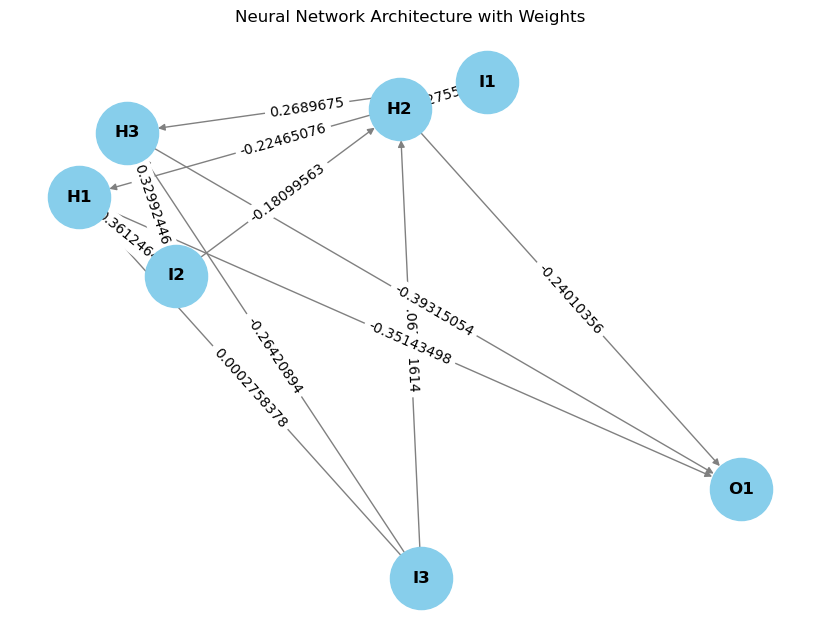

In [80]:
G = nx.DiGraph()  # Directed graph to show input to output flow

# Get layer weights and biases
layer_1_weights = model.layers[0].get_weights()[0]  # Shape: (3, 3)
layer_1_biases = model.layers[0].get_weights()[1]   # Shape: (3,)
output_weights = model.layers[1].get_weights()[0]   # Shape: (3, 1)
output_bias = model.layers[1].get_weights()[1]      # Shape: (1,)

# Add nodes for each neuron in each layer
input_layer = ['I1', 'I2', 'I3']  # Inputs
hidden_layer = ['H1', 'H2', 'H3']  # Hidden layer
output_layer = ['O1']  # Output

G.add_nodes_from(input_layer + hidden_layer + output_layer)

# Add edges with weights between input and hidden layers
for i, input_node in enumerate(input_layer):
    for j, hidden_node in enumerate(hidden_layer):
        G.add_edge(input_node, hidden_node, weight=layer_1_weights[i, j])

# Add edges with weights between hidden and output layers
for j, hidden_node in enumerate(hidden_layer):
    G.add_edge(hidden_node, output_layer[0], weight=output_weights[j, 0])

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for the nodes
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# Annotate edges with the weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Neural Network Architecture with Weights")
plt.show()